In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Loading in 100-subflow train set just for simplicity
k_train = np.load("../Feature-Vectors/train-test-flows/100-p-subflows/Final-80-Random-Known-TRAIN.npy")
u_train = np.load("../Feature-Vectors/train-test-flows/100-p-subflows/Final-80-Random-Unknown-TRAIN.npy")

save_dir = "../ECDFs/"

In [17]:
def graph_dist_range_cdf(known_vals, unknown_vals, vals, file_name, feature_name, title=None):    
    plt.figure(figsize=(7, 7));
    plt.plot(vals, known_vals, label="Known Traffic Values", color='b');
    plt.plot(vals, unknown_vals, label="Unknown Traffic Values", color='r');
    if title is not None:
        plt.suptitle(title, fontsize=14);
    plt.xlabel(feature_name, fontsize=14);
    plt.ylabel("Percentage of Subflows", fontsize=14);
    plt.legend(loc="best", fontsize=12);
    plt.grid(True);
    plt.savefig(file_name)

def cdf_val(feature_ind, k_data, u_data, file_name, feature_name):
    # Get all feature values for the given feature and the given datasets
    k_vals = np.array([vec[feature_ind] for vec in k_data])
    u_vals = np.array([vec[feature_ind] for vec in u_data])
    # Over entire value range, find the percentage of avg NN dists that are equal to or less than the distance
    val_max = np.amax(k_vals) if np.amax(k_vals) > np.amax(u_vals) else np.amax(u_vals)
    val_min = np.amin(k_vals) if np.amin(k_vals) < np.amin(u_vals) else np.amin(u_vals)
    vals = np.linspace(val_min, val_max, 10000)
    unknown_portions = []
    known_portions = []
    for v in vals:
        known_p = len(np.where(k_vals < v)[0]) / len(k_vals)
        if known_p == 1:
            known_done = True
        unknown_p = len(np.where(u_vals < v)[0]) / len(u_vals)
        if unknown_p == 1:
            unknown_p = True
        known_portions.append(known_p)
        unknown_portions.append(unknown_p)
    # Saving CDF vals
    unknown_cdf_vals = np.array(unknown_portions); known_cdf_vals = np.array(known_portions)
    # Plot the CDF, all in one graph
    graph_dist_range_cdf(known_cdf_vals, unknown_cdf_vals, vals, file_name, feature_name)

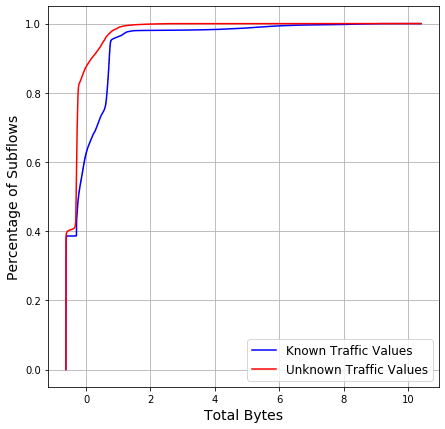

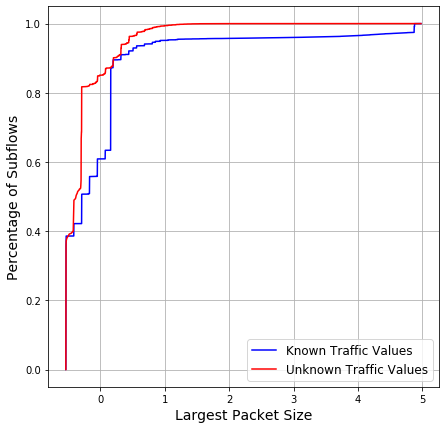

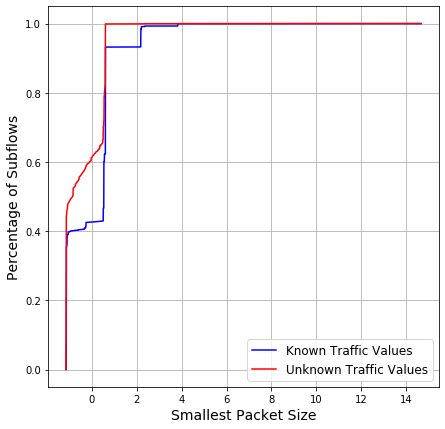

In [20]:
cdf_val(0, k_train, u_train, f"{save_dir}/total-bytes-CDF", "Total Bytes")
cdf_val(1, k_train, u_train, f"{save_dir}/largest-packet-size-CDF", "Largest Packet Size")
cdf_val(2, k_train, u_train, f"{save_dir}/smallest-packet-size-CDF", "Smallest Packet Size")

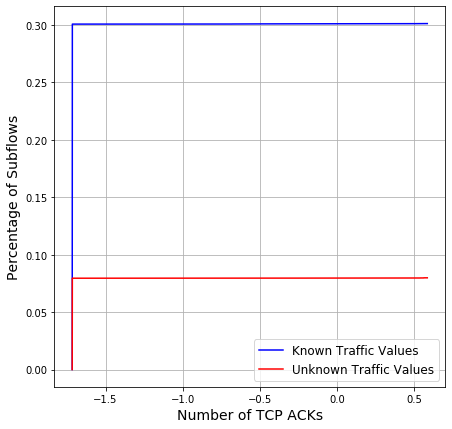

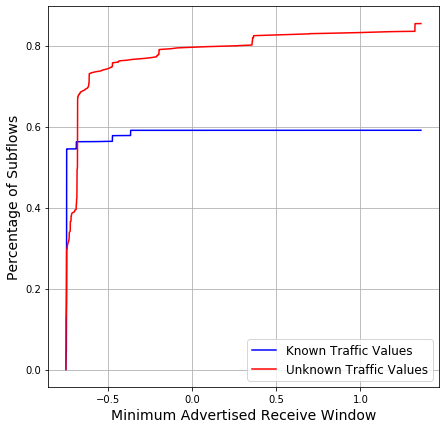

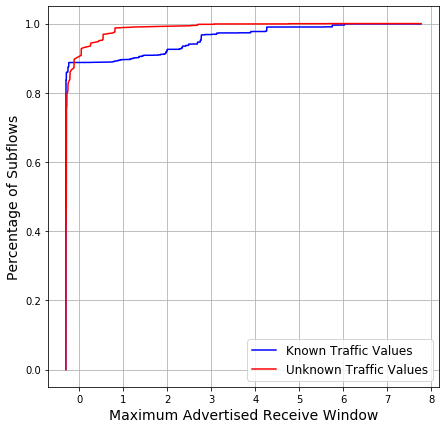

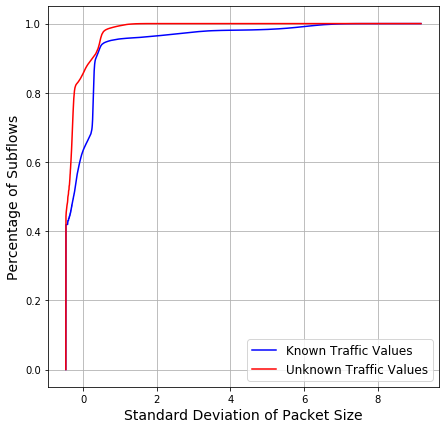

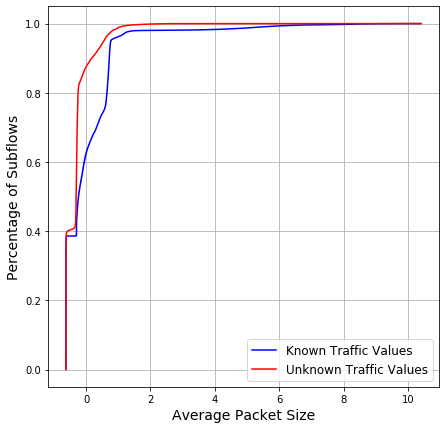

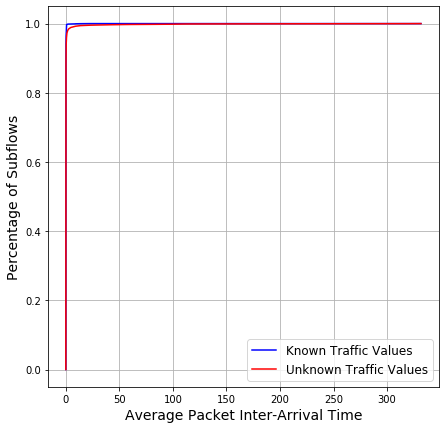

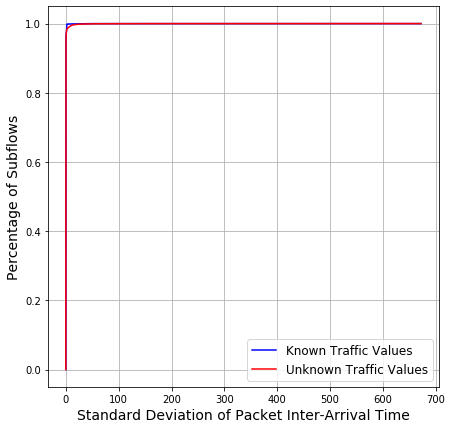

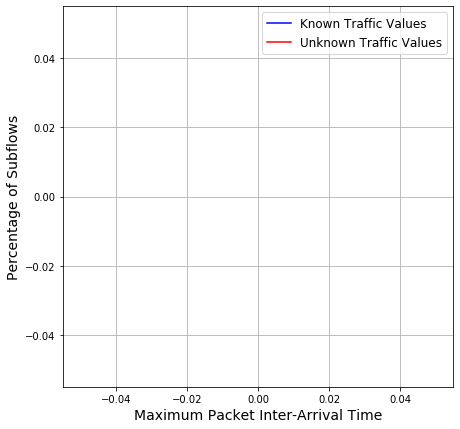

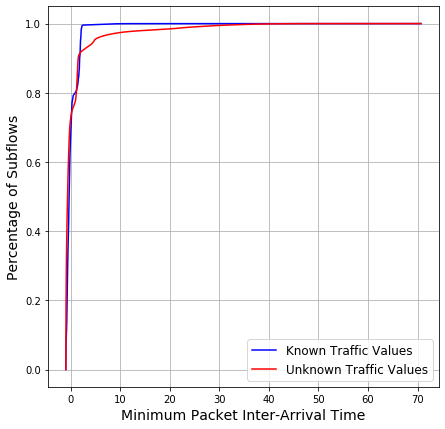

In [21]:
cdf_val(3, k_train, u_train, f"{save_dir}/tcp-acks-CDF", "Number of TCP ACKs")
cdf_val(4, k_train, u_train, f"{save_dir}/min-win-CDF", "Minimum Advertised Receive Window")
cdf_val(5, k_train, u_train, f"{save_dir}/max-win-CDF", "Maximum Advertised Receive Window")
cdf_val(6, k_train, u_train, f"{save_dir}/std-dev-packet-size-CDF", "Standard Deviation of Packet Size")
cdf_val(7, k_train, u_train, f"{save_dir}/avg-packet-size-CDF", "Average Packet Size")
cdf_val(8, k_train, u_train, f"{save_dir}/arr-avg-CDF", "Average Packet Inter-Arrival Time")
cdf_val(9, k_train, u_train, f"{save_dir}/arr-std-dev-CDF", "Standard Deviation of Packet Inter-Arrival Time")
cdf_val(10, k_train, u_train, f"{save_dir}/arr-max-CDF", "Maximum Packet Inter-Arrival Time")
cdf_val(11, k_train, u_train, f"{save_dir}/arr-min-CDF", "Minimum Packet Inter-Arrival Time")

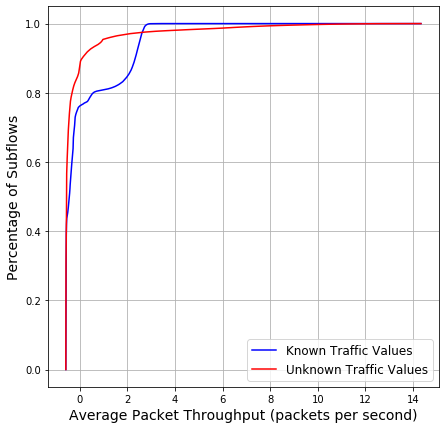

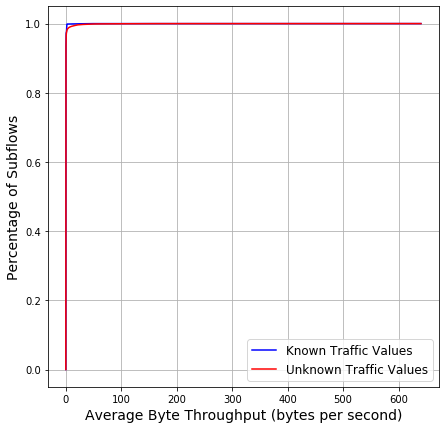

In [22]:
cdf_val(12, k_train, u_train, f"{save_dir}/avg-packet-thrp-CDF", "Average Packet Throughput (packets per second)")
cdf_val(13, k_train, u_train, f"{save_dir}/avg-byte-thrp-CDF", "Average Byte Throughput (bytes per second)")